In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

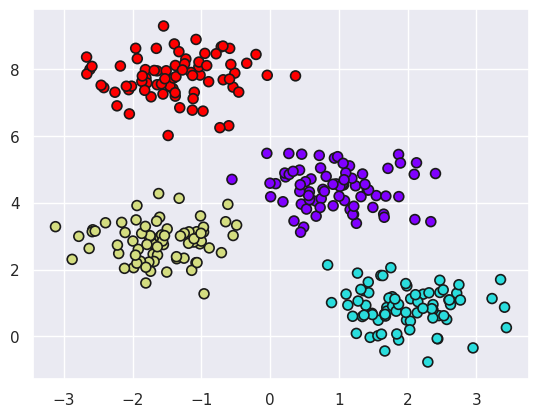

In [3]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=300, n_features=2, centers=4,
                 random_state=0, cluster_std=0.6)
plt.scatter(X[:,0], X[:,1], c=y, s=50, ec='k', lw=1.2,
            cmap=mpl.colormaps['rainbow'].resampled(4))

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, n_init='auto')
labels = model.fit_predict(X)
center = model.cluster_centers_

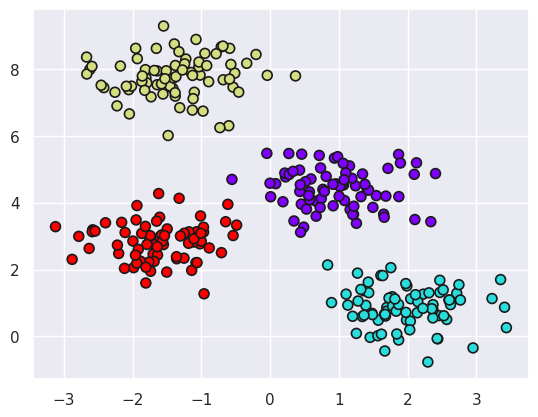

In [5]:
plt.scatter(X[:,0], X[:,1], c=labels, s=50, ec='k', lw=1.2,
            cmap=mpl.colormaps['rainbow'].resampled(4))

In [8]:
from scipy.spatial.distance import cdist
from matplotlib.patches import Circle

def plot_kmeans(kmeans, X, ax=None):
  ax = ax or plt.gca()

  labels = kmeans.fit_predict(X)
  centers= kmeans.cluster_centers_

  ax.scatter(X[:,0], X[:,1], c=labels, s=50, ec='k', lw=2.0, zorder=2,
             cmap=mpl.colormaps['rainbow'].resampled(4))

  radii = np.array([
      cdist(X[i==labels], [c]).max()
      for i,c in enumerate(centers)
  ])

  for c,r in zip(centers, radii):
    circ = Circle(c, r, fc='white', ec='k', lw=2.0, alpha=0.3, zorder=1)
    ax.add_patch(circ)
  ax.axis('equal')


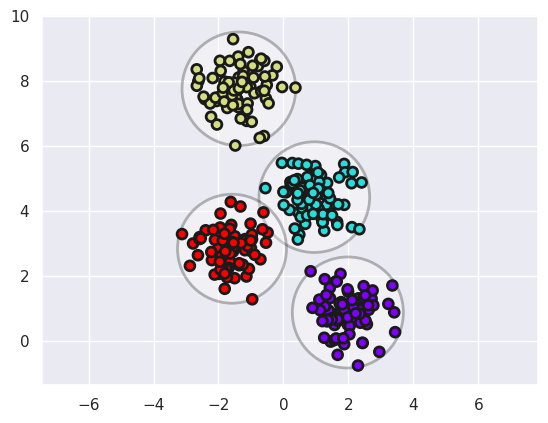

In [9]:
plot_kmeans(model, X)

In [10]:
rng = np.random.RandomState(42)
R   = rng.rand(2,2)
X2 = np.dot(X, R)

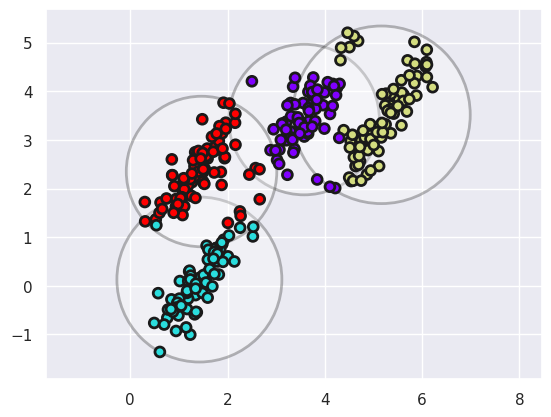

In [11]:
model = KMeans(n_clusters=4, n_init='auto')
plot_kmeans(model, X2)